In [142]:
pip install pyhht

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
pip install vmdpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from pyhht.emd import EMD
from pyhht.visualization import plot_imfs
from pywt import wavedec

from vmdpy import VMD

In [146]:
# Load the data from a CSV file into a pandas dataframe
df = pd.read_excel('/content/Book1(1).xlsx' , sheet_name='Sheet1')


In [147]:
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,2008037S10055,2008,9,SI,MM,IVAN,2008-02-05 12:00:00,TS,-10.35,55.2,...,,,9,,,,,,7,124
2,2008037S10055,2008,9,SI,MM,IVAN,2008-02-05 15:00:00,TS,-10.5313,55.4749,...,,,,,,,,,6,123
3,2008037S10055,2008,9,SI,MM,IVAN,2008-02-05 18:00:00,TS,-10.7,55.75,...,,,9,,,,,,6,120
4,2008037S10055,2008,9,SI,MM,IVAN,2008-02-05 21:00:00,TS,-10.85,56.025,...,,,,,,,,,6,119


In [148]:

print(df.columns)


Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=163)


In [149]:
df.dropna(subset=['ISO_TIME'], inplace=True)


In [150]:
df = df[pd.to_datetime(df['ISO_TIME'], errors='coerce').notnull()]


In [151]:
# Convert date column to datetime object and set it as index
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df = df.set_index('ISO_TIME')


In [152]:
train_ratio = 0.8
test_ratio = 0.2

train_data, test_data = train_test_split(df, train_size=train_ratio, shuffle=False)


In [153]:
df.fillna(df.mean(), inplace=True)
df.fillna(value=0, inplace=True)  # Fill missing values with 0
df.drop_duplicates(inplace=True)  # Drop duplicate rows
# Impute missing values with mean
df = df.fillna(df.mean())


<ipython-input-153-d02bc5f5c357>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)
<ipython-input-153-d02bc5f5c357>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [154]:
import numpy as np

# replace non-numeric characters with NaN
train_data = train_data.replace('[^0-9.]', np.nan, regex=True)
test_data = test_data.replace('[^0-9.]', np.nan, regex=True)

# convert to float and remove NaN values
train_data = train_data.astype(float)
train_data = train_data[~np.isnan(train_data)]

test_data = test_data.astype(float)
test_data = test_data[~np.isnan(test_data)]


In [155]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error




In [156]:

# select columns with non-numeric data types
non_numeric_cols = df.select_dtypes(exclude=['float', 'int']).columns

# select only the non-numeric columns
non_numeric_data = df[non_numeric_cols]

In [157]:
df = df.drop(columns=non_numeric_cols)


In [158]:
df = df[['LAT']]

In [159]:
train_data, test_data = train_test_split(df, train_size=train_ratio, shuffle=False)

def arima_model(train_data, test_data):
    model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu',solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200)
    model.fit(train_data, train_data.values.ravel())
    predictions = model.predict(test_data)
    return predictions

def lssvm_model(train_data, test_data):
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    model.fit(train_data, train_data.values.ravel())
    predictions = model.predict(test_data)
    return predictions



In [160]:
def bp_model(train_data, test_data):
    model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu',solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200)
    model.fit(train_data, train_data.values.ravel())
    predictions = model.predict(test_data)
    return predictions

In [161]:
def VMD_model(train_data, test_data):
    model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu',solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200)
    model.fit(train_data, train_data.values.ravel())
    predictions = model.predict(test_data)
    return predictions

In [162]:
def CEEMDAN_model(train_data, test_data):
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    model.fit(train_data, train_data.values.ravel())
    predictions = model.predict(test_data)
    return predictions


In [163]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, mape, rmse

# Evaluate the models and store the results
results = []

In [164]:
arima_pred = arima_model(train_data, test_data)
arima_eval = evaluate_model(test_data, arima_pred)
results.append(('ARIMA', *arima_eval))


In [165]:

bp_pred = bp_model(train_data, test_data)
bp_eval = evaluate_model(test_data, bp_pred)


results.append(('BP', *bp_eval))


In [166]:
lssvm_pred = lssvm_model(train_data, test_data)
lssvm_eval = evaluate_model(test_data, lssvm_pred)
results.append(('LSSVM', *lssvm_eval))


In [167]:
Vmd_pred = VMD_model(train_data, test_data)
Vmd_eval = evaluate_model(test_data, Vmd_pred)
results.append(('Vmd', *Vmd_eval))

In [168]:
CEEMDAN_pred = CEEMDAN_model(train_data, test_data)
CEEMDA_eval = evaluate_model(test_data, CEEMDAN_pred)
results.append(('CEEMDA', *CEEMDA_eval))

In [169]:
# Add the other models here (DE-BP, EMD BP, CEEMDAN BP, etc.)

# Save the results to an Excel file
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MAPE', 'RMSE'])
results_df.to_excel('model_results.xlsx', index=False)

print("Results saved to 'model_results.xlsx'")

Results saved to 'model_results.xlsx'


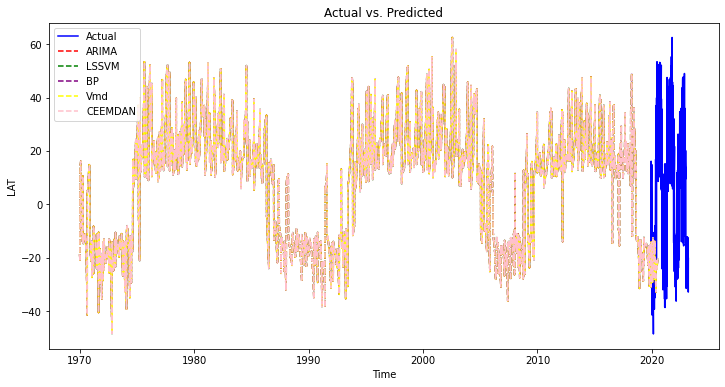

In [170]:
import matplotlib.pyplot as plt

def plot_results(true_values, arima_pred, lssvm_pred, bp_pred,Vmd_pred, CEEMDAN_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(true_values, label='Actual', color='blue')
    plt.plot(arima_pred, label='ARIMA', color='red', linestyle='--')
    plt.plot(lssvm_pred, label='LSSVM', color='green', linestyle='--')
    plt.plot(bp_pred, label='BP', color='purple', linestyle='--')
    plt.plot(Vmd_pred, label='Vmd', color='yellow', linestyle='--')
    plt.plot(CEEMDAN_pred, label='CEEMDAN', color='pink', linestyle='--')
    # Uncomment the following lines to add other models to the plot
    # plt.plot(de_bp_pred, label='DE-BP', color='cyan', linestyle='--')
    # plt.plot(emd_bp_pred, label='EMD BP', color='magenta', linestyle='--')
    # ...

    plt.xlabel('Time')
    plt.ylabel('LAT')
    plt.legend()
    plt.title('Actual vs. Predicted')
    plt.show()

plot_results(test_data, arima_pred, lssvm_pred, bp_pred , Vmd_pred,CEEMDAN_pred)
